In [48]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gym
from collections import deque
import random
import time
import yaml
from klqr import *
from train_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
with open('config.yml','r') as ymlfile:
    config = yaml.load(ymlfile)
    
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))

In [43]:
env = gym.make('TransformedLQ-v0')
agent = klqr(config,sess)
agent.build_model()
training_curve = train_agent(agent,env,max_timesteps=10000, n_transitions_between_updates=100,
                             n_optim_steps_per_update=200,
                             n_iters_per_p_update=5,
                            )

z shape: (?, 3)
********** Iteration 1 ************
	Episode Len: 100
	Last Episode Cost: 1157.214424 vs optimal 0.000000
********** Iteration 2 ************
	Episode Len: 1
	Last Episode Cost: 3.107384 vs optimal 151.945077
********** Iteration 3 ************
	Episode Len: 100
	Last Episode Cost: 789.573010 vs optimal 37.269868
********** Iteration 4 ************
	Episode Len: 100
	Last Episode Cost: 1227.669588 vs optimal 115.798097
********** Iteration 5 ************
[[ 2.4426677  -1.7629962  -0.9850029 ]
 [-1.7629962   4.4035788   0.95372903]
 [-0.9850029   0.95372903  1.7269447 ]]
	Episode Len: 100
	Last Episode Cost: 737.338708 vs optimal 28.077327
********** Iteration 6 ************
	Episode Len: 100
	Last Episode Cost: 190.574086 vs optimal 20.985960
********** Iteration 7 ************
	Episode Len: 100
	Last Episode Cost: 211.005265 vs optimal 15.713587
********** Iteration 8 ************
	Episode Len: 100
	Last Episode Cost: 690.500553 vs optimal 93.059338
********** Iteratio

In [44]:
#test

agent.max_a = 100.0
agent.min_a = -100.0
train_agent(agent,env,max_timesteps=1000,training=False)

********** Iteration 1 ************
	Episode Len: 100
	Last Episode Cost: 283.857209 vs optimal 0.000000
********** Iteration 2 ************
	Episode Len: 1
	Last Episode Cost: 1.429744 vs optimal 14.989642
********** Iteration 3 ************
	Episode Len: 100
	Last Episode Cost: 104.490203 vs optimal 100.155814
********** Iteration 4 ************
	Episode Len: 100
	Last Episode Cost: 63.137574 vs optimal 62.625735
********** Iteration 5 ************
	Episode Len: 100
	Last Episode Cost: 2.623912 vs optimal 2.572072
********** Iteration 6 ************
	Episode Len: 100
	Last Episode Cost: 39.613106 vs optimal 39.065049
********** Iteration 7 ************
	Episode Len: 100
	Last Episode Cost: 11.021794 vs optimal 10.913970
********** Iteration 8 ************
	Episode Len: 100
	Last Episode Cost: 16.080607 vs optimal 14.747713
********** Iteration 9 ************
	Episode Len: 100
	Last Episode Cost: 2.575087 vs optimal 2.556054
********** Iteration 10 ************
	Episode Len: 100
	Last

[-51.61620607637108,
 -61.197412903087454,
 -66.23260669711267,
 -68.01576513148053,
 -59.796829638399366,
 -51.97939063716575,
 -72.19992818358412,
 -57.01728657027683,
 -68.51643749482909,
 -57.15370971328744,
 -62.576214555006516]

In [13]:
#test
test_rollout(agent, env, 100)

-25.862430603557964

In [85]:
sess.run(agent.A)

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]], dtype=float32)

In [84]:
sess.run(agent.B)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [83]:
sess.run(agent.Q)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [82]:
sess.run(agent.R)

array([[nan]], dtype=float32)

In [17]:
A,B,Q,R = (env.env.A, env.env.B, env.env.Q, env.env.R)
P = Q
for k in range(100):
    P = Q + A.T @ P @ A - A.T @ P.T @ B @ np.linalg.inv(R + B.T @ P @ B ) @ B.T @ P @ A
    P = 0.5*(P + P.T)

In [18]:
P

array([[2.23999771, 0.54694411, 0.19286546],
       [0.54694411, 2.35082156, 0.54694411],
       [0.19286546, 0.54694411, 2.23999771]])

In [19]:
sess.run(agent.P)

array([[ 1.4385443e+00,  3.4560442e-02,  1.3267036e-01],
       [ 3.4560442e-02,  5.1228347e+00, -1.2631528e+01],
       [ 1.3267036e-01, -1.2631528e+01,  9.5166641e+01]], dtype=float32)

In [50]:
opt_reward = compute_optimal_reward(env, 50)

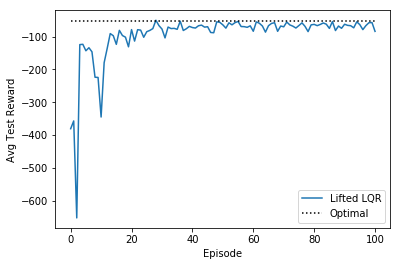

In [58]:
plt.figure()
plt.plot(np.arange(len(training_curve)), training_curve, label='Lifted LQR')
plt.plot([0, len(training_curve)-1], [opt_reward, opt_reward], linestyle=':', color='black', label='Optimal')
plt.xlabel('Episode')
plt.ylabel('Avg Test Reward')
plt.legend()
plt.show()

In [37]:
test_rollout(agent, env, 50)

-144.6358680702729